In [1]:
import warnings
warnings.filterwarnings("ignore")

import math
import pandas as pd
import numpy as np
from numpy import loadtxt, where

from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from pylab import scatter, show, legend, xlabel, ylabel

C:\Users\Rajiv2806\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset = pd.read_csv("C:\Users\Rajiv2806\Documents\Resumes\Inkredo Assesement\events_log.csv")
dataset = dataset.sort_values(['session_id','timestamp'])
dataset = dataset.fillna(0.0)
dataset.index = np.arange(1, len(dataset) + 1)

## Data set preperation for Modelling

In [3]:
dataset=dataset.groupby(['session_id','action'], as_index=False)['result_position','group','n_results','checkin'].max()
dataset.head(4)

,session_id,action,result_position,group,n_results,checkin
0,0000cbcb67c19c45,searchResultPage,0.0,b,20.0,0.0
1,0001382e027b2ea4,checkin,1.0,b,0.0,300.0
2,0001382e027b2ea4,searchResultPage,0.0,b,18.0,0.0
3,0001382e027b2ea4,visitPage,1.0,b,0.0,0.0


In [4]:
clicks = dataset[dataset.action == 'visitPage']
clicks['Target_click'] = 1
noclicks = dataset[dataset.action <> 'visitPage']
noclicks['Target_click'] = 0

noclicks.index = np.arange(1, len(noclicks) + 1)

clicks = clicks.groupby(['session_id','Target_click'], as_index=False)['result_position','group','n_results','checkin'].max()
noclicks = noclicks.groupby(['session_id','Target_click'], as_index=False)['result_position','group','n_results','checkin'].max()

clicks.index = np.arange(1, len(clicks) + 1)
noclicks.index = np.arange(1, len(noclicks) + 1)

clicks.head(4)

,session_id,Target_click,result_position,group,n_results,checkin
1,0001382e027b2ea4,1,1.0,b,0.0,0.0
2,0001e8bb90445cb2,1,1.0,b,0.0,0.0
3,00064fe774048046,1,1.0,a,0.0,0.0
4,0007b7f6b575feb6,1,1.0,a,0.0,0.0


In [5]:
noclicks.head(4)

,session_id,Target_click,result_position,group,n_results,checkin
1,0000cbcb67c19c45,0,0.0,b,20.0,0.0
2,0001382e027b2ea4,0,1.0,b,18.0,300.0
3,0001e8bb90445cb2,0,1.0,b,20.0,420.0
4,000216cf18ae1ab1,0,0.0,a,20.0,0.0


In [13]:
# session_list = list(clicks.session_id)
# p=0
# noclicks[~noclicks['session_id'].isin(session_list)]

In [6]:
dataset_model = pd.DataFrame(columns = ['session_id','Target_click','result_position','n_results','checkin'])
dataset_model = dataset_model.append(noclicks)
dataset_model = dataset_model.append(clicks)

dataset_model.index = np.arange(1, len(dataset_model) + 1)

In [7]:
dataset_model.group = pd.Categorical(pd.factorize(dataset_model.group)[0])
dataset_model.Target_click = pd.Categorical(pd.factorize(dataset_model.Target_click)[0])
dataset_model.head(4)

,Target_click,checkin,group,n_results,result_position,session_id
1,0,0.0,0,20.0,0.0,0000cbcb67c19c45
2,0,300.0,0,18.0,1.0,0001382e027b2ea4
3,0,420.0,0,20.0,1.0,0001e8bb90445cb2
4,0,0.0,1,20.0,0.0,000216cf18ae1ab1


In [8]:
# Independant Variable
x = dataset_model[["result_position","group","checkin","n_results"]]
x = np.array(x)

#Scaling the variables
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
x = min_max_scaler.fit_transform(x)

#Dependant Variable
y = dataset_model["Target_click"]
y = np.array(y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.40)

### Logistic Regression

In [9]:
Logist_reg = LogisticRegression()
Logist_reg.fit(x_train,y_train)
print 'Logistic Regression - Training Data Accuracy:', Logist_reg.score(x_train,y_train)
print 'Logistic Regression - Test Data Accuracy:', Logist_reg.score(x_test,y_test)

Logistic Regression - Training Data Accuracy: 0.895439710682
Logistic Regression - Test Data Accuracy: 0.891852557487


### Decission Trees Classifiers

In [15]:
d_tree = DecisionTreeClassifier(max_depth=1)  #should adujest Max depth of the tree here # We are getting 99% accuracy for max depth 2
d_tree.fit(x_train, y_train)
print "Decision Tree - Training Data Accuracy:",d_tree.score(x_train,y_train)
print "Decision Tree - Training Data Accuracy:",d_tree.score(x_test,y_test)

Decision Tree - Training Data Accuracy: 0.914474728764
Decision Tree - Training Data Accuracy: 0.916091132809


### K-NN Calssifier

In [23]:
# ?KNeighborsClassifier
knn = KNeighborsClassifier()  #default K=5 # we are getting 99% accuracy with these features for k=1
knn.fit(x_train, y_train)
print "KNeighborsClassifier - Training Data Accuracy:",knn.score(x_train,y_train)
print "KNeighborsClassifier - Training Data Accuracy:",knn.score(x_test,y_test)

KNeighborsClassifier - Training Data Accuracy: 0.999929434595
KNeighborsClassifier - Training Data Accuracy: 0.999973538673


### Naive Bayes Classifier

In [24]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train, y_train)
print "NaiveBayesClassifier - Training Data Accuracy:",NaiveBayes.score(x_train,y_train)
print "NaiveBayesClassifier - Training Data Accuracy:",NaiveBayes.score(x_test,y_test)

NaiveBayesClassifier - Training Data Accuracy: 0.915021610655
NaiveBayesClassifier - Training Data Accuracy: 0.916593898018


### Linear Discriminant Analysis

In [25]:
Lda = LinearDiscriminantAnalysis()
Lda.fit(x_train, y_train)
print "LDA - Training Data Accuracy:",Lda.score(x_train,y_train)
print "LDA - Training Data Accuracy:",Lda.score(x_test,y_test)

LDA - Training Data Accuracy: 0.888753638529
LDA - Training Data Accuracy: 0.884364002011


### Support Vector Machines

In [26]:
SVM_Classifier = SVC()
SVM_Classifier.fit(x_train, y_train)
print "SVM - Training Data Accuracy:",SVM_Classifier.score(x_train,y_train)
print "SVM - Training Data Accuracy:",SVM_Classifier.score(x_test,y_test)

SVM - Training Data Accuracy: 0.894681132575
SVM - Training Data Accuracy: 0.890476568495


In [27]:
Classifiers_df = pd.DataFrame(columns = ['Classifier_Name','Training_Score','Testing_Score'])

Classifiers_df.at[1,'Classifier_Name'] = "Logistic"
Classifiers_df.at[1,'Training_Score'] = Logist_reg.score(x_train,y_train)
Classifiers_df.at[1,'Testing_Score'] = Logist_reg.score(x_test,y_test)

Classifiers_df.at[2,'Classifier_Name'] = "D_Tree"
Classifiers_df.at[2,'Training_Score'] = d_tree.score(x_train,y_train)
Classifiers_df.at[2,'Testing_Score'] = d_tree.score(x_test,y_test)

Classifiers_df.at[3,'Classifier_Name'] = "K-NN"
Classifiers_df.at[3,'Training_Score'] = knn.score(x_train,y_train)
Classifiers_df.at[3,'Testing_Score'] = knn.score(x_test,y_test)

Classifiers_df.at[4,'Classifier_Name'] = "NaiveBayes"
Classifiers_df.at[4,'Training_Score'] = NaiveBayes.score(x_train,y_train)
Classifiers_df.at[4,'Testing_Score'] = NaiveBayes.score(x_test,y_test)

Classifiers_df.at[5,'Classifier_Name'] = "LDA"
Classifiers_df.at[5,'Training_Score'] = Lda.score(x_train,y_train)
Classifiers_df.at[5,'Testing_Score'] = Lda.score(x_test,y_test)

Classifiers_df.at[6,'Classifier_Name'] = "SVM"
Classifiers_df.at[6,'Training_Score'] = SVM_Classifier.score(x_train,y_train)
Classifiers_df.at[6,'Testing_Score'] = SVM_Classifier.score(x_test,y_test)

Classifiers_df

,Classifier_Name,Training_Score,Testing_Score
1,Logistic,0.89544,0.891853
2,D_Tree,0.914475,0.916091
3,K-NN,0.999929,0.999974
4,NaiveBayes,0.915022,0.916594
5,LDA,0.888754,0.884364
6,SVM,0.894681,0.890477


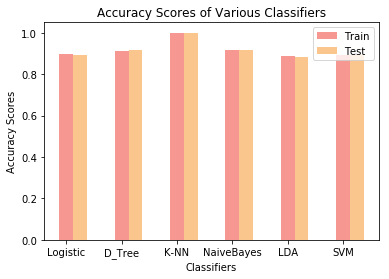

In [28]:
pos = list(range(len(Classifiers_df))) ;width = 0.25 

plt.bar(pos, Classifiers_df['Training_Score'],width, alpha=0.5,color='#EE3224') 
plt.bar([p + width for p in pos], Classifiers_df['Testing_Score'],width,alpha=0.5,color='#F78F1E') 

plt.xlabel('Classifiers')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Scores of Various Classifiers')

p = np.arange(6)
plt.xticks(p,Classifiers_df.Classifier_Name)

plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

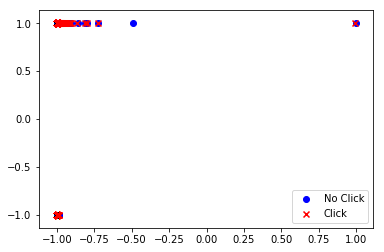

In [29]:
pos = where(y == 1)
neg = where(y == 0)
scatter(x[pos, 0], x[pos, 1], marker='o', c='b')
scatter(x[neg, 0], x[neg, 1], marker='x', c='r')
legend(['No Click', 'Click'])
show()